In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
!nvidia-smi -L

GPU 0: Tesla P100-PCIE-16GB (UUID: GPU-b8d31bfa-9e5c-be83-7f08-b668b4665cc1)


In [3]:
!git clone https://github.com/openai/CLIP
!pip uninstall taming-transformers
!git clone https://github.com/CompVis/taming-transformers.git
!pip install ftfy regex tqdm omegaconf pytorch-lightning
!pip install kornia
!pip install imageio-ffmpeg   
!pip install einops          
!pip install timm
!mkdir steps

%cd /content/drive/Othercomputers/HomePC/Neurophysiological-Data-Decoding/ 

fatal: destination path 'CLIP' already exists and is not an empty directory.
fatal: destination path 'taming-transformers' already exists and is not an empty directory.
mkdir: cannot create directory ‘steps’: File exists
/content/drive/Othercomputers/HomePC/Neurophysiological-Data-Decoding


In [4]:
#@markdown #**Selection of models to download**
#@markdown ---
#@markdown **By default, the notebook downloads the 1024 and 16384 models from ImageNet. There are others like COCO-Stuff, WikiArt 1024, WikiArt 16384, FacesHQ or S-FLCKR, which are heavy, and if you are not going to use them it would be pointless to download them, so if you want to use them, simply select the models to download.**

#@markdown ---

imagenet_1024 = False #@param {type:"boolean"}
imagenet_16384 = True #@param {type:"boolean"}
coco = False #@param {type:"boolean"}
faceshq = False #@param {type:"boolean"}
wikiart_1024 = False #@param {type:"boolean"}
wikiart_16384 = False #@param {type:"boolean"}
sflckr = False #@param {type:"boolean"}
openimages_8192 = False #@param {type:"boolean"}

if imagenet_1024:
  !curl -L -o vqgan_imagenet_f16_1024.yaml -C - 'https://heibox.uni-heidelberg.de/d/8088892a516d4e3baf92/files/?p=%2Fconfigs%2Fmodel.yaml&dl=1' #ImageNet 1024
  !curl -L -o vqgan_imagenet_f16_1024.ckpt -C - 'https://heibox.uni-heidelberg.de/d/8088892a516d4e3baf92/files/?p=%2Fckpts%2Flast.ckpt&dl=1'  #ImageNet 1024
if imagenet_16384:
  !curl -L -o vqgan_imagenet_f16_16384.yaml -C - 'https://heibox.uni-heidelberg.de/d/a7530b09fed84f80a887/files/?p=%2Fconfigs%2Fmodel.yaml&dl=1' #ImageNet 16384
  !curl -L -o vqgan_imagenet_f16_16384.ckpt -C - 'https://heibox.uni-heidelberg.de/d/a7530b09fed84f80a887/files/?p=%2Fckpts%2Flast.ckpt&dl=1' #ImageNet 16384
if openimages_8192:
  !curl -L -o vqgan_openimages_f16_8192.yaml -C - 'https://heibox.uni-heidelberg.de/d/2e5662443a6b4307b470/files/?p=%2Fconfigs%2Fmodel.yaml&dl=1' #ImageNet 16384
  !curl -L -o vqgan_openimages_f16_8192.ckpt -C - 'https://heibox.uni-heidelberg.de/d/2e5662443a6b4307b470/files/?p=%2Fckpts%2Flast.ckpt&dl=1' #ImageNet 16384

if coco:
  !curl -L -o coco.yaml -C - 'https://dl.nmkd.de/ai/clip/coco/coco.yaml' #COCO
  !curl -L -o coco.ckpt -C - 'https://dl.nmkd.de/ai/clip/coco/coco.ckpt' #COCO
if faceshq:
  !curl -L -o faceshq.yaml -C - 'https://drive.google.com/uc?export=download&id=1fHwGx_hnBtC8nsq7hesJvs-Klv-P0gzT' #FacesHQ
  !curl -L -o faceshq.ckpt -C - 'https://app.koofr.net/content/links/a04deec9-0c59-4673-8b37-3d696fe63a5d/files/get/last.ckpt?path=%2F2020-11-13T21-41-45_faceshq_transformer%2Fcheckpoints%2Flast.ckpt' #FacesHQ
if wikiart_1024: 
  !curl -L -o wikiart_1024.yaml -C - 'http://mirror.io.community/blob/vqgan/wikiart.yaml' #WikiArt 1024
  !curl -L -o wikiart_1024.ckpt -C - 'http://mirror.io.community/blob/vqgan/wikiart.ckpt' #WikiArt 1024
if wikiart_16384: 
  !curl -L -o wikiart_16384.yaml -C - 'http://mirror.io.community/blob/vqgan/wikiart_16384.yaml' #WikiArt 16384
  !curl -L -o wikiart_16384.ckpt -C - 'http://mirror.io.community/blob/vqgan/wikiart_16384.ckpt' #WikiArt 16384
if sflckr:
  !curl -L -o sflckr.yaml -C - 'https://heibox.uni-heidelberg.de/d/73487ab6e5314cb5adba/files/?p=%2Fconfigs%2F2020-11-09T13-31-51-project.yaml&dl=1' #S-FLCKR
  !curl -L -o sflckr.ckpt -C - 'https://heibox.uni-heidelberg.de/d/73487ab6e5314cb5adba/files/?p=%2Fcheckpoints%2Flast.ckpt&dl=1' #S-FLCKR

** Resuming transfer from byte position 692
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
  0     0    0     0    0     0      0      0 --:--:--  0:00:01 --:--:--     0
** Resuming transfer from byte position 980092370
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0


In [5]:
#@markdown #**Loading libraries and definitions**

import argparse
import math
from pathlib import Path
import sys

sys.path.insert(1, '/content/taming-transformers')
from IPython import display
from base64 import b64encode
from omegaconf import OmegaConf
from PIL import Image
from taming.models import cond_transformer, vqgan
import taming.modules 
import torch
from torch import nn, optim
from torch.nn import functional as F
from torchvision import transforms
from torchvision.transforms import functional as TF
from tqdm.notebook import tqdm

from CLIP import clip
import kornia.augmentation as K
import numpy as np
import imageio
from PIL import ImageFile, Image
ImageFile.LOAD_TRUNCATED_IMAGES = True


def sinc(x):
    return torch.where(x != 0, torch.sin(math.pi * x) / (math.pi * x), x.new_ones([]))


def lanczos(x, a):
    cond = torch.logical_and(-a < x, x < a)
    out = torch.where(cond, sinc(x) * sinc(x/a), x.new_zeros([]))
    return out / out.sum()


def ramp(ratio, width):
    n = math.ceil(width / ratio + 1)
    out = torch.empty([n])
    cur = 0
    for i in range(out.shape[0]):
        out[i] = cur
        cur += ratio
    return torch.cat([-out[1:].flip([0]), out])[1:-1]


def resample(input, size, align_corners=True):
    n, c, h, w = input.shape
    dh, dw = size

    input = input.view([n * c, 1, h, w])

    if dh < h:
        kernel_h = lanczos(ramp(dh / h, 2), 2).to(input.device, input.dtype)
        pad_h = (kernel_h.shape[0] - 1) // 2
        input = F.pad(input, (0, 0, pad_h, pad_h), 'reflect')
        input = F.conv2d(input, kernel_h[None, None, :, None])

    if dw < w:
        kernel_w = lanczos(ramp(dw / w, 2), 2).to(input.device, input.dtype)
        pad_w = (kernel_w.shape[0] - 1) // 2
        input = F.pad(input, (pad_w, pad_w, 0, 0), 'reflect')
        input = F.conv2d(input, kernel_w[None, None, None, :])

    input = input.view([n, c, h, w])
    return F.interpolate(input, size, mode='bicubic', align_corners=align_corners)


class ReplaceGrad(torch.autograd.Function):
    @staticmethod
    def forward(ctx, x_forward, x_backward):
        ctx.shape = x_backward.shape
        return x_forward

    @staticmethod
    def backward(ctx, grad_in):
        return None, grad_in.sum_to_size(ctx.shape)


replace_grad = ReplaceGrad.apply


class ClampWithGrad(torch.autograd.Function):
    @staticmethod
    def forward(ctx, input, min, max):
        ctx.min = min
        ctx.max = max
        ctx.save_for_backward(input)
        return input.clamp(min, max)

    @staticmethod
    def backward(ctx, grad_in):
        input, = ctx.saved_tensors
        return grad_in * (grad_in * (input - input.clamp(ctx.min, ctx.max)) >= 0), None, None


clamp_with_grad = ClampWithGrad.apply


def vector_quantize(x, codebook):
    d = x.pow(2).sum(dim=-1, keepdim=True) + codebook.pow(2).sum(dim=1) - 2 * x @ codebook.T
    indices = d.argmin(-1)
    x_q = F.one_hot(indices, codebook.shape[0]).to(d.dtype) @ codebook
    return replace_grad(x_q, x)

def load_vqgan_model(config_path, checkpoint_path):
    config = OmegaConf.load(config_path)
    if config.model.target == 'taming.models.vqgan.VQModel':
        model = vqgan.VQModel(**config.model.params)
        model.eval().requires_grad_(False)
        model.init_from_ckpt(checkpoint_path)
    elif config.model.target == 'taming.models.vqgan.GumbelVQ':
        model = vqgan.GumbelVQ(**config.model.params)
        model.eval().requires_grad_(False)
        model.init_from_ckpt(checkpoint_path)
    elif config.model.target == 'taming.models.cond_transformer.Net2NetTransformer':
        parent_model = cond_transformer.Net2NetTransformer(**config.model.params)
        parent_model.eval().requires_grad_(False)
        parent_model.init_from_ckpt(checkpoint_path)
        model = parent_model.first_stage_model
    else:
        raise ValueError(f'unknown model type: {config.model.target}')
    del model.loss
    return model


def resize_image(image, out_size):
    ratio = image.size[0] / image.size[1]
    area = min(image.size[0] * image.size[1], out_size[0] * out_size[1])
    size = round((area * ratio)**0.5), round((area / ratio)**0.5)
    return image.resize(size, Image.LANCZOS)

In [6]:
#@markdown #**Parameters**
#@markdown ---

width =  224#@param {type:"number"}
height = 224#@param {type:"number"}
model = "vqgan_imagenet_f16_16384" #@param ["vqgan_imagenet_f16_16384", "vqgan_imagenet_f16_1024", "vqgan_openimages_f16_8192", "wikiart_1024", "wikiart_16384", "coco", "faceshq", "sflckr"]
images_interval =  50#@param {type:"number"}
init_image = ""#@param {type:"string"}
target_images = ""#@param {type:"string"}
seed = -1#@param {type:"number"}
max_iterations = 300#@param {type:"number"}

model_names = {
    "vqgan_imagenet_f16_16384": 'ImageNet 16384',
    "vqgan_imagenet_f16_1024": "ImageNet 1024", 
    'vqgan_openimages_f16_8192': 'OpenImages 8912',
    "wikiart_1024": "WikiArt 1024", 
    "wikiart_16384": "WikiArt 16384", 
    "coco": "COCO-Stuff", 
    "faceshq": "FacesHQ", 
    "sflckr": "S-FLCKR"
}
name_model = model_names[model]

if seed == -1:
    seed = None
if init_image == "None":
    init_image = None
if target_images == "None" or not target_images:
    target_images = []
else:
    target_images = target_images.split("|")
    target_images = [image.strip() for image in target_images]


args = argparse.Namespace(
    image_prompts=target_images,
    noise_prompt_seeds=[],
    noise_prompt_weights=[],
    size=[width, height],
    init_image=init_image,
    init_weight=0.,
    clip_model='ViT-B/32',
    vqgan_config=f'{model}.yaml',
    vqgan_checkpoint=f'{model}.ckpt',
    step_size=0.1,
    cutn=32,
    cut_pow=1.,
    display_freq=images_interval,
    seed=seed,
)

In [9]:
import numpy as np
import h5py
from pathlib import Path

model_name = 'ViT-B=32'
group_name = 'group-1'
subject = 'subj01'
fold_name = 'val'

to_load = [
    ('ViT-B=32', 'group-1'),
    ('DPT_Large', 'group-3'),
]


Y_pred = {}
root = Path('/content/drive/Othercomputers/HomePC/')
for model_name, group_name in to_load:
    decoded_embeddings_file = h5py.File(root / 'decoded_features' / model_name / f'{group_name}.hdf5')
    subject_embeddings = decoded_embeddings_file[subject]

    for embedding_name, embedding in subject_embeddings.items():
        print(embedding_name)
        stimulus_ids = embedding[fold_name]['stimulus_ids'][:]
        break

    Y_pred.update({
        embedding_name: embedding[fold_name]['Y_pred']
        for embedding_name, embedding in decoded_embeddings_file[subject].items()
    })

def load_embedding(i):
    if isinstance(i, int):
        i = [i]
    y = {
        k: torch.from_numpy(v[i]).to(torch.float16).to(device)
        for k, v in Y_pred.items()
    }
    return y

model_names = [load[0] for load in to_load]
results_root = root / 'reconstructions' / '__'.join(model_names) / group_name / subject
results_root.mkdir(parents=True, exist_ok=True)

embedding
scratch.refinenet4


# New Section

In [10]:
from functools import partial

device = "cuda" if torch.cuda.is_available() else "cpu"
perceptor, preprocess = clip.load('ViT-B/32', device=device)
perceptor = perceptor.visual
perceptor = perceptor.eval().requires_grad_(False).to(device)

save_modules = {
    **{f'transformer.resblocks.{i}': f'transformer.resblocks.{i}' for i in range(12)},
    '': 'embedding'
}
modules = dict(perceptor.named_modules())
embeddings = {}
def forward_hook(module_name, module, x_in, x_out):
    embeddings[module_name] = x_out

hook_handles = []
for module_name, feature_name in save_modules.items():
    module = modules[module_name]
    hook_handle = module.register_forward_hook(partial(forward_hook, feature_name))
    hook_handles.append(hook_handle)

In [11]:
# Load depth model
depth_model_name = "DPT_Large" # "DPT_Large" or "DPT_Hybrid"
depth_predictor = torch.hub.load("intel-isl/MiDaS", depth_model_name)
depth_predictor.to(device)
depth_predictor.eval().requires_grad_(False).to(device)
depth_preprocess = torch.hub.load('intel-isl/MiDaS', 'transforms').dpt_transform

save_modules = {
    'scratch.refinenet4': 'scratch.refinenet4'
}
modules = dict(depth_predictor.named_modules())
for module_name, feature_name in save_modules.items():
    module = modules[module_name]
    hook_handle = module.register_forward_hook(partial(forward_hook, feature_name))
    hook_handles.append(hook_handle)

Using cache found in /root/.cache/torch/hub/intel-isl_MiDaS_master
Using cache found in /root/.cache/torch/hub/intel-isl_MiDaS_master


In [20]:
#@markdown **Generate a video with the result (You can edit frame rate and stuff by double-clicking this tab)**

def create_video(images, path='video.mp4'):
    frames = [Image.fromarray(image) for image in images]
    tqdm.write('Generating video...')
    fps = 60

    from subprocess import Popen, PIPE
    p = Popen([
          'ffmpeg', '-y', 
          '-f', 'image2pipe', 
          '-vcodec', 'png', 
          '-r', str(fps), 
          '-i', '-', 
          '-vcodec', 'libx264', 
          '-r', str(fps), 
          '-pix_fmt', 'yuv420p', 
          '-crf', '11', 
          '-preset', 'veryslow', 
          path
    ], stdin=PIPE)
    
    for im in tqdm(frames):
        im.save(p.stdin, 'PNG')
    p.stdin.close()

    p.wait()
    print("The video is now being compressed, wait ...")

    p.wait()
    print("The video is ready")

In [13]:
#@markdown **Generate a video with the result (You can edit frame rate and stuff by double-clicking this tab)**

def create_video(init_frame, last_frame, path='video.mp4'):
    min_fps = 10
    max_fps = 60

    total_frames = last_frame - init_frame

    length = total_frames / 60 #Desired time of the video in seconds

    frames = []
    tqdm.write('Generating video...')
    for i in range(init_frame,last_frame): #
        frames.append(Image.open("./steps/"+ str(i) +'.png'))

    #fps = last_frame/10
    fps = np.clip(total_frames/length,min_fps,max_fps)

    from subprocess import Popen, PIPE
    p = Popen([
          'ffmpeg', '-y', 
          '-f', 'image2pipe', 
          '-vcodec', 'png', 
          '-r', str(fps), 
          '-i', '-', 
          '-vcodec', 'libx264', 
          '-r', str(fps), 
          '-pix_fmt', 'yuv420p', 
          '-crf', '11', 
          '-preset', 'veryslow', 
          path
    ], stdin=PIPE)
    for im in tqdm(frames):
        im.save(p.stdin, 'PNG')
    p.stdin.close()

    p.wait()
    print("The video is now being compressed, wait ...")

    p.wait()
    print("The video is ready")

Using device: cuda:0
Working with z of shape (1, 256, 16, 16) = 65536 dimensions.
loaded pretrained LPIPS loss from taming/modules/autoencoder/lpips/vgg.pth
VQLPIPSWithDiscriminator running with hinge loss.
Restored from vqgan_imagenet_f16_16384.ckpt
Using seed: 8346412042270532746


  0%|          | 0/500 [00:00<?, ?it/s]

/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:3635: UserWarning: Default upsampling behavior when mode=bilinear is changed to align_corners=False since 0.4.0. Please specify align_corners=True if the old behavior is desired. See the documentation of nn.Upsample for details.
  "See the documentation of nn.Upsample for details.".format(mode)


i: 0, loss: 0.628008


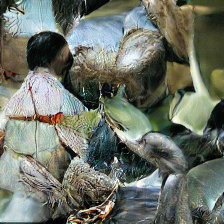

i: 50, loss: 0.103032


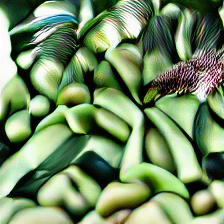

i: 100, loss: 0.0738883


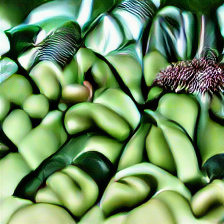

i: 150, loss: 0.0653999


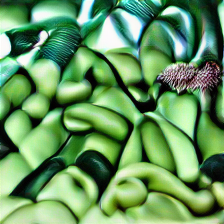

i: 200, loss: 0.0892312


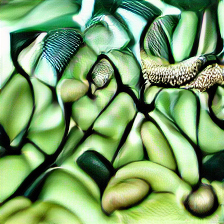

i: 250, loss: 0.0653588


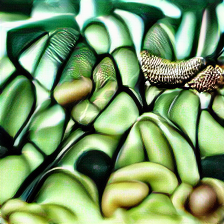

i: 300, loss: 0.0782156


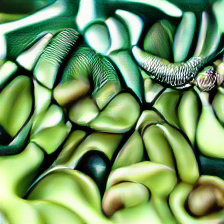

i: 350, loss: 0.0667599


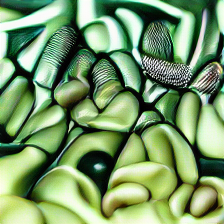

i: 400, loss: 0.0671543


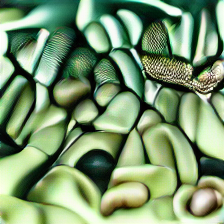

i: 450, loss: 0.0546814


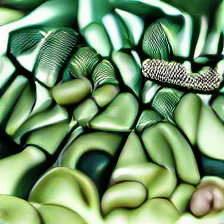

Generating video...


  0%|          | 0/500 [00:00<?, ?it/s]

The video is now being compressed, wait ...
The video is ready


  0%|          | 0/500 [00:00<?, ?it/s]

/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:3635: UserWarning: Default upsampling behavior when mode=bilinear is changed to align_corners=False since 0.4.0. Please specify align_corners=True if the old behavior is desired. See the documentation of nn.Upsample for details.
  "See the documentation of nn.Upsample for details.".format(mode)


i: 0, loss: 0.394323


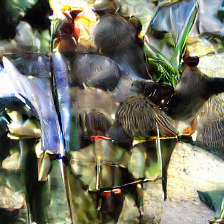

i: 50, loss: 0.0837452


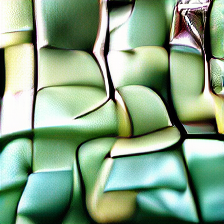

i: 100, loss: 0.0758711


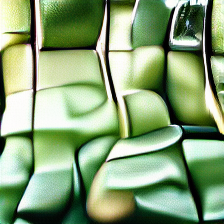

KeyboardInterrupt: ignored

In [22]:
#@markdown #**Optimization**

#@markdown ---
from einops import rearrange
from urllib.request import urlopen
from shutil import copyfile
from torch.optim.lr_scheduler import ExponentialLR, LambdaLR
import random

def crowson_distance(x, y):
    x = F.normalize(x, dim=-1)
    y = F.normalize(y, dim=-1)
    return torch.arcsin((x - y).norm(dim=-1) / 2).pow(2) * 2.

def cosine_distance(x, y):
    x = F.normalize(x, dim=-1)
    y = F.normalize(y, dim=-1)
    return 1. - (x * y).sum(dim=-1)

def surface_distance(x, y):
    x = F.normalize(x, dim=-1)
    y = F.normalize(y, dim=-1)
    cos_angle = (x * y).sum(dim=-1)
    angle = torch.acos(cos_angle)
    return angle

def square_surface_distance(x, y):
    distance = surface_distance(x, y)
    return distance * distance


class MakeCutouts(nn.Module):
    def __init__(self, cut_size, cutn, cut_pow=1.):
        super().__init__()
        self.cut_size = cut_size
        self.cutn = cutn
        self.cut_pow = cut_pow

        self.augs = nn.Sequential(
            # K.RandomHorizontalFlip(p=0.5),
            # K.RandomVerticalFlip(p=0.5),
            # K.RandomSolarize(0.01, 0.01, p=0.7),
            # K.RandomSharpness(0.3,p=0.4),
            # K.RandomResizedCrop(size=(self.cut_size,self.cut_size), scale=(0.1,1),  ratio=(0.75,1.333), cropping_mode='resample', p=0.5),
            # K.RandomCrop(size=(self.cut_size,self.cut_size), p=0.5),
            K.RandomAffine(degrees=15, translate=0.1, p=0.7, padding_mode='border'),
            K.RandomPerspective(0.7, p=0.7),
            #K.ColorJitter(hue=0.1, saturation=0.1, p=0.7),
            #K.RandomErasing((.1, .4), (.3, 1/.3), same_on_batch=True, p=0.7),
        )
        
        self.noise_fac = 0.1
        self.av_pool = nn.AdaptiveAvgPool2d((self.cut_size, self.cut_size))
        self.max_pool = nn.AdaptiveMaxPool2d((self.cut_size, self.cut_size))

    def forward(self, input):
        sideY, sideX = input.shape[2:4]
        max_size = min(sideX, sideY)
        min_size = min(sideX, sideY, self.cut_size)
        cutouts = []
        
        for _ in range(self.cutn):

            # size = int(torch.rand([])**self.cut_pow * (max_size - min_size) + min_size)
            # offsetx = torch.randint(0, sideX - size + 1, ())
            # offsety = torch.randint(0, sideY - size + 1, ())
            # cutout = input[:, :, offsety:offsety + size, offsetx:offsetx + size]
            # cutouts.append(resample(cutout, (self.cut_size, self.cut_size)))

            # cutout = transforms.Resize(size=(self.cut_size, self.cut_size))(input)
            
            cutout = (self.av_pool(input) + self.max_pool(input))/2
            cutouts.append(cutout)
        batch = self.augs(torch.cat(cutouts, dim=0))
        #if self.noise_fac:
        #    facs = batch.new_empty([self.cutn, 1, 1, 1]).uniform_(0, self.noise_fac)
        #    batch = batch + facs * torch.randn_like(batch)
        return batch

class EmbeddingLoss(nn.Module):
    def __init__(self):
        super().__init__()

    def forward(self, x, y, t):
        #loss = torch.stack([
        #    ((x[f'transformer.resblocks.{i}'] - y[f'transformer.resblocks.{i}']) ** 2).mean()
        #    for i in range(12)
        #]).mean()

        #i = int(t * 13)
        #if i <= 11:
        #   loss = ((x[f'transformer.resblocks.{i}'] - y[f'transformer.resblocks.{i}']) ** 2).mean()
        #else:
        #   loss = crowson_distance(x['embedding'], y['embedding']).mean()
        loss = ((x['scratch.refinenet4'] - y['scratch.refinenet4']) ** 2).mean()
      
        loss = loss * x[f'embedding'].shape[0]
        return loss

run_id = hex(np.random.randint(2 ** 32)).split('x')[1]
run_note = '''

'''
run_folder = results_root / run_id
run_folder.mkdir(parents=True, exist_ok=True)
with open(run_folder / 'note.txt', 'w') as f:
    f.write(run_note)

batch_size = 1

device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
print('Using device:', device)

model = load_vqgan_model(args.vqgan_config, args.vqgan_checkpoint).to(device)

for block_id in range(12): #stimulus_id in stimulus_ids[:]:
    seed = torch.seed()
    torch.manual_seed(seed)
    print('Using seed:', seed)
    
    for stimulus_batch in np.split(np.arange(stimulus_ids.shape[0]), stimulus_ids.shape[0] // batch_size):
        stimulus_embeddings = load_embedding(stimulus_batch)

        f = 2 ** (model.decoder.num_resolutions - 1)
        cut_size = perceptor.input_resolution
        make_cutouts = MakeCutouts(cut_size, args.cutn, cut_pow=args.cut_pow)

        toksX, toksY = args.size[0] // f, args.size[1] // f
        sideX, sideY = toksX * f, toksY * f

        if args.vqgan_checkpoint == 'vqgan_openimages_f16_8192.ckpt':
            e_dim = 256
            n_toks = model.quantize.n_embed
            vqgan_embedding_weights = model.quantize.embed.weight
        else:
            e_dim = model.quantize.e_dim
            n_toks = model.quantize.n_e
            vqgan_embedding_weights = model.quantize.embedding.weight

        z_min = vqgan_embedding_weights.min(dim=0).values[None, :, None, None]
        z_max = vqgan_embedding_weights.max(dim=0).values[None, :, None, None]

        selection = (vqgan_embedding_weights.norm(dim=1) > 1).nonzero()[:, 0]
        embedding_indices = torch.randint(selection.shape[0], [toksY * toksX, stimulus_batch.shape[0]], device=device)
        embedding_indices = selection[embedding_indices]
        one_hot = F.one_hot(embedding_indices, n_toks).float()
        z = one_hot @ vqgan_embedding_weights
        z = rearrange(z, '(w h) n e -> n e w h', w=toksX, h=toksY)
        
        #with torch.no_grad():
        #    x2 = torch.stack([
        #        TF.to_tensor(image.resize((sideX, sideY), Image.LANCZOS))
        #        for image in image_data
        #    ]).to(device)
        #    z, *_ = model.encode(x2 * 2. - 1.)

        #z = torch.rand_like(z) * 2

        z.requires_grad_(True)
        
        optimizer = optim.Adam([z], lr=10)
        max_iterations = 500

        criterion = EmbeddingLoss()

        normalize = transforms.Normalize(mean=[0.48145466, 0.4578275, 0.40821073],
                                         std=[0.26862954, 0.26130258, 0.27577711])

        images = []
        for i in tqdm(range(max_iterations)):
            optimizer.zero_grad()

            z_q = vector_quantize(z.movedim(1, 3), vqgan_embedding_weights).movedim(3, 1)
            image = clamp_with_grad(model.decode(z_q).add(1).div(2), 0, 1)
            
            #cutouts = make_cutouts(image)
            cutouts = normalize(image)
            depth_image = F.interpolate(cutouts, size=(384, 384), mode='bicubic', align_corners=False)
            depth_predictor(depth_image)

            perceptor(cutouts.to(torch.float16)).float()

            t = i / max_iterations
            loss = criterion(stimulus_embeddings, embeddings, t)

            loss.backward()
            optimizer.step()
            #with torch.no_grad():
            #    z.copy_(z.maximum(z_min).minimum(z_max))

            image_bytes = image.mul(255).clamp(0, 255).cpu().detach().numpy().astype(np.uint8)
            image_bytes = rearrange(image_bytes, 'n c w h -> n w h c')
            images.append(image_bytes)
            
            if i % 50 == 0:
                with torch.no_grad():
                    tqdm.write(f'i: {i}, loss: {loss.item():g}')
                    TF.to_pil_image(image_bytes[0]).save('progress.png')
                    display.display(display.Image('progress.png'))
        
        stim_video_path = results_root / run_id / 'videos'
        stim_image_path = results_root / run_id / 'images'
        stim_video_path.mkdir(exist_ok=True, parents=True)
        stim_image_path.mkdir(exist_ok=True, parents=True)

        #for image_bytes in tqdm(images):
        #    imageio.imwrite('/content/steps/' + str(i) + '.png', np.array(image_bytes))

        batch_stim_ids = stimulus_ids[stimulus_batch]
        for i, image_id in enumerate(stimulus_batch):
            stim_id = batch_stim_ids[i]
            file_name = f'image-{image_id}_stim-{batch_stim_ids[i]}_seed-{seed}'
            video_path = str(stim_video_path / f'{file_name}.mp4')
            image_path = str(stim_image_path / f'{file_name}.png')
            this_images = [image[i] for image in images]
            create_video(this_images, video_path)
            imageio.imwrite(image_path, this_images[-1])

In [ ]:
import gc
gc.collect()

torch.cuda.empty_cache()